In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%cd /content/drive/My Drive/IDD

/content/drive/My Drive/IDD


In [0]:
from imutils import paths
from tqdm import tqdm
labels_path = paths.list_images("/content/drive/My Drive/IDD/JSON_IMG/Val_Label")
labels_path = sorted(labels_path)


import cv2
from keras.utils.np_utils import to_categorical
import numpy as np
colors = np.array([
    [0,1,0,0,0,0,0,0],      
    [0,0,1,0,0,0,0,0],     
    [0,0,0,1,0,0,0,0],      
    [0,0,0,0,1,0,0,0],        
    [0,0,0,0,0,1,0,0],     
    [0,0,0,0,0,0,1,0],       
    [0,0,0,0,0,0,0,1],     
    [1,0,0,0,0,0,0,0]           
], dtype=np.int)

image_y_cv = []
for name in tqdm(labels_path):
  image = cv2.imread(name)
  image = cv2.resize(image, (256, 256))
  r,g,b =cv2.split(image)
  color_image = np.zeros(
        (r.shape[0], r.shape[1], 8), dtype=np.int)
  for i in range(8):
    color_image[r == i] = colors[i]
  image_y_cv.append(color_image)

from imutils import paths
x_path = paths.list_images("/content/drive/My Drive/IDD/leftImg8bit/val")
x_path = sorted(x_path)

import cv2
image_cv = []
for name in tqdm(x_path):
  image = cv2.imread(name)
  image_cv.append(cv2.resize(image, (256, 256))/255)

import numpy as np
image_cv = np.array(image_cv)
image_y_cv = np.array(image_y_cv)
image_y_cv.shape,image_cv.shape

  



Using TensorFlow backend.
100%|██████████| 1055/1055 [17:51<00:00,  1.02s/it]


((1055, 256, 256, 8), (1055, 256, 256, 3))

In [0]:
from imutils import paths
x_path = paths.list_images("/content/drive/My Drive/IDD/leftImg8bit/train")
x_path = sorted(x_path)
x_path[:5]
from imutils import paths
labels_path = paths.list_images("/content/drive/My Drive/IDD/JSON_IMG/Train_Label")
labels_path = sorted(labels_path)
labels_path[:5],x_path[:5]

(['/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame0029_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame0299_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame0779_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame1019_gtFine_polygons.png',
  '/content/drive/My Drive/IDD/JSON_IMG/Train_Label/201_frame1469_gtFine_polygons.png'],
 ['/content/drive/My Drive/IDD/leftImg8bit/train/201/frame0029_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame0299_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame0779_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame1019_leftImg8bit.jpg',
  '/content/drive/My Drive/IDD/leftImg8bit/train/201/frame1469_leftImg8bit.jpg'])

In [0]:
import cv2
import gc
import numpy as np
from tqdm import tqdm
colors = np.array([
    [0,1,0,0,0,0,0,0],      
    [0,0,1,0,0,0,0,0],     
    [0,0,0,1,0,0,0,0],      
    [0,0,0,0,1,0,0,0],        
    [0,0,0,0,0,1,0,0],    
    [0,0,0,0,0,0,1,0],      
    [0,0,0,0,0,0,0,1],     
    [1,0,0,0,0,0,0,0]           
], dtype=np.int)
#global block
block = 0
def train_label():
    ''' Since train data doesn't fit on RAM.Than we would create a pipeline so that we pass a part of data for training and fit it on RAM'''
  global block
  image_y = []
  if block + 200 <= 7034:
    for name in tqdm(labels_path[block:block + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (256, 256))
      r,g,b =cv2.split(image)
      color_image = np.zeros(
        (r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]

      image_y.append(color_image)
    block = block + 200
  elif block < 7034:
      for name in labels_path[block:]:
        image = cv2.imread(name)
        image = cv2.resize(image, (256, 256))
        r,g,b =cv2.split(image)
        color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
        for i in range(8):
          color_image[r == i] = colors[i]
        image_y.append(color_image)
      block = 0
  else:
    block = 0
    for name in tqdm(labels_path[block:block + 200]):
      image = cv2.imread(name)
      image = cv2.resize(image, (256, 256))
      r,g,b =cv2.split(image)
      color_image = np.zeros((r.shape[0], r.shape[1], 8), dtype=np.int)
      for i in range(8):
        color_image[r == i] = colors[i]
      image_y.append(color_image)
    block = block + 200
  image_y = np.array(image_y)
  collected = gc.collect()  
  print("Garbage collector: collected", 
          "%d objects." % collected)
  return image_y


  


In [0]:
import cv2
block_1 = 0
def train():
    ''' Since train data doesn't fit on RAM.Than we would create a pipeline so that we pass a part of data for training and fit it on RAM'''
  collected = gc.collect()
  print("Garbage collector: collected","%d objects." % collected) 
  global block_1
  image_tr = []
  if block_1 + 200 <= 7034:
    for name in tqdm(x_path[block_1:block_1 + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (256, 256))
      img = np.float32(img)  / 255 
      image_tr.append(img)
    block_1 = block_1 + 200
  elif block_1 < 7034:
    for name in tqdm(x_path[block_1:]):
      image = cv2.imread(name)
      img = cv2.resize(image, (256, 256))
      img = np.float32(img)  / 255 
      image_tr.append(img)
    block_1 = 0
  else:
    block_1 = 0
    for name in tqdm(x_path[block_1:block_1 + 200]):
      image = cv2.imread(name)
      img = cv2.resize(image, (256, 256))
      img = np.float32(img)  / 255
      image_tr.append(img)
    block_1 = block_1 + 200
  image_tr = np.array(image_tr)
  return image_tr 





In [0]:
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
def unet(pretrained_weights = None,input_size = (256,256,3)):
    ''' Returns UNET model'''
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(8, 1, activation = 'softmax')(conv9)

    model = Model(input = inputs, output = conv10)

    model.compile(optimizer = Adam(lr = 0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy',miou])
    
    #model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights)

    return model

In [0]:
# Load the TensorBoard notebook extension
from keras.callbacks import TensorBoard
%load_ext tensorboard
import tensorflow as tf
import datetime, os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard("logs", histogram_freq=1)

In [0]:
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau

earlyStopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='min')
mcp_save = ModelCheckpoint('unet_no_data_augument.hdf5', save_best_only=True, monitor='val_loss', mode='min')
#reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, epsilon=1e-4, mode='min')


In [0]:
def IoU(y_val, y_pred):
    '''Computing average area over intersection'''
    class_iou = []
    n_classes = 8
    
    y_predi = np.argmax(y_pred, axis=3)
    y_truei = np.argmax(y_val, axis=3)
    
    for c in range(n_classes):
        TP = np.sum((y_truei == c) & (y_predi == c))
        FP = np.sum((y_truei != c) & (y_predi == c))
        FN = np.sum((y_truei == c) & (y_predi != c)) 
        IoU = TP / float(TP + FP + FN)
        if(float(TP + FP + FN) == 0):
          IoU=TP/0.001
        class_iou.append(IoU)
    MIoU=sum(class_iou)/n_classes
    return MIoU
def miou( y_true, y_pred ) :
    score = tf.py_function( lambda y_true, y_pred : IoU( y_true, y_pred).astype('float32'),
                        [y_true, y_pred],
                        'float32')
    return score

In [0]:
model = unet()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',miou])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 128, 128, 64) 0           conv2d_2[0][0]                   
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


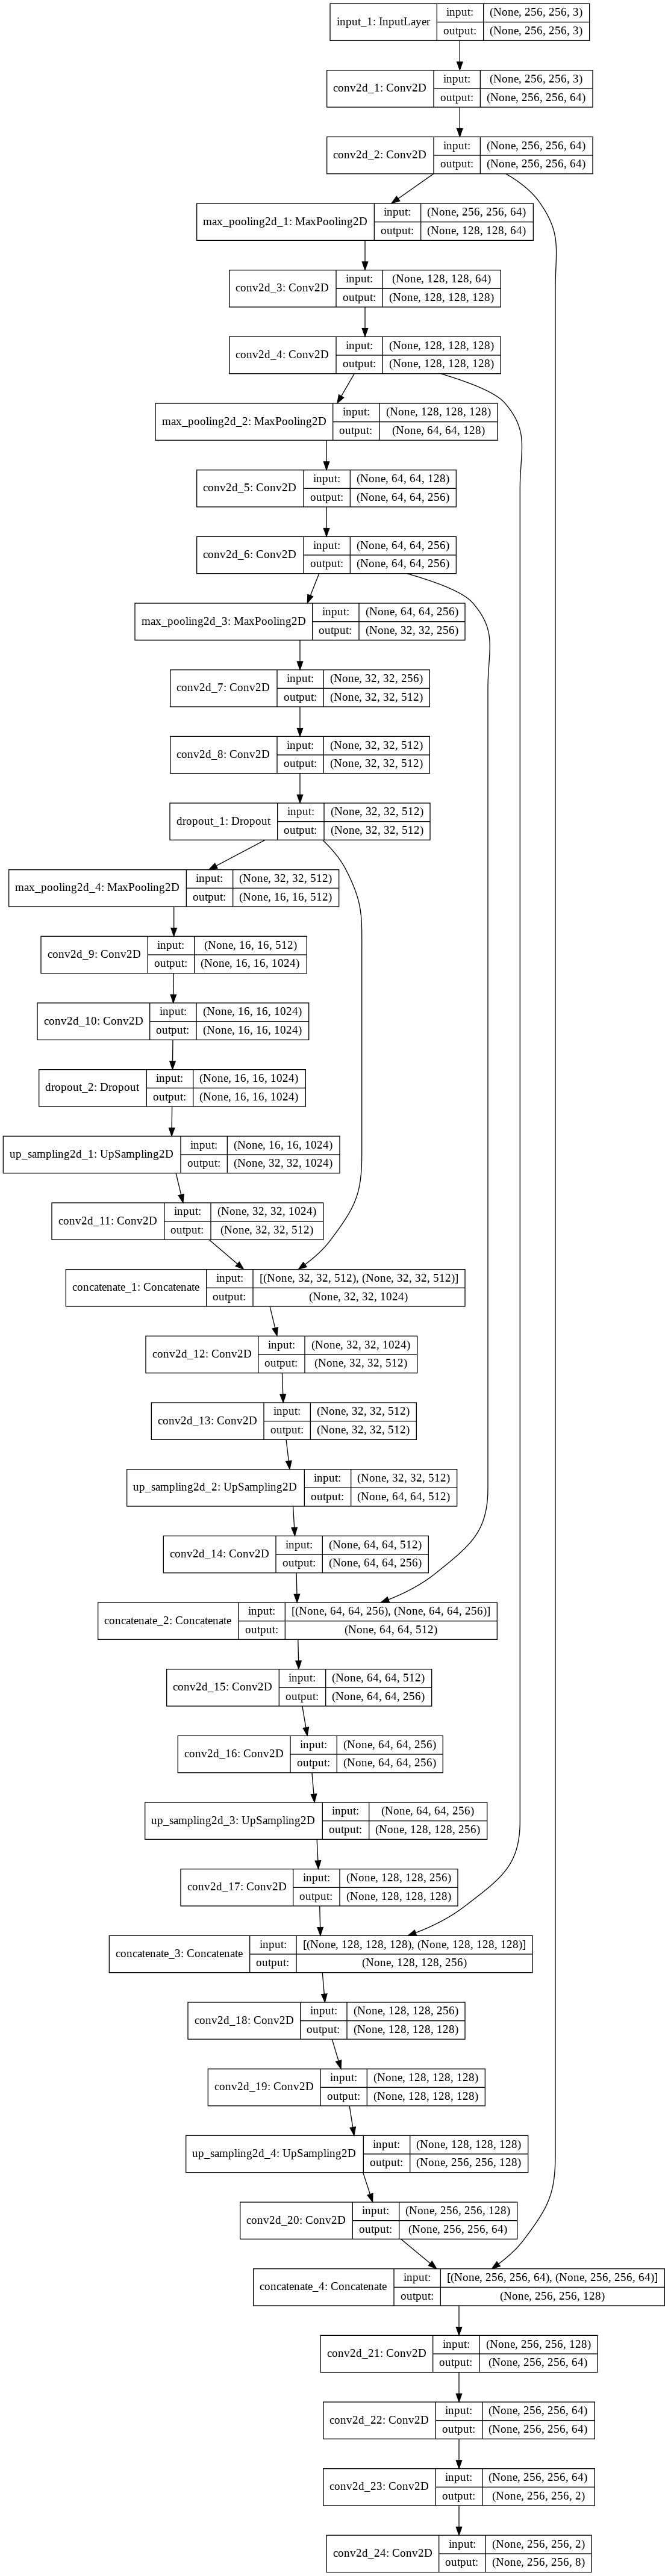

In [0]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='unet_no_data_augument.png', show_shapes=True, show_layer_names=True)

In [0]:
flag = 1
history_1 = []
while(flag):
  x  = train()  
  y = train_label()
  history = model.fit(x,y,batch_size=5,epochs = 3 ,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))
  history_1.append(history)
  flag = int(input ("Enter 0 if you want to stop training" ))
  if flag == 0:
    break


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 11698 objects.


100%|██████████| 200/200 [01:59<00:00,  1.67it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
 10/200 [>.............................] - ETA: 5:56 - loss: 8.5114 - accuracy: 0.1481 - miou: 0.0215 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


200/200 [==============================] - 173s 867ms/step - loss: 2.3430 - accuracy: 0.4256 - miou: 0.0944 - val_loss: 1.7837 - val_accuracy: 0.4225 - val_miou: 0.1066
Epoch 2/3
200/200 [==============================] - 156s 781ms/step - loss: 1.5096 - accuracy: 0.5442 - miou: 0.1760 - val_loss: 1.6658 - val_accuracy: 0.3907 - val_miou: 0.1287
Epoch 3/3
200/200 [==============================] - 156s 781ms/step - loss: 1.3349 - accuracy: 0.6210 - miou: 0.2259 - val_loss: 1.9613 - val_accuracy: 0.5693 - val_miou: 0.1802
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [02:00<00:00,  1.66it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 157s 785ms/step - loss: 1.3777 - accuracy: 0.7095 - miou: 0.2539 - val_loss: 1.4600 - val_accuracy: 0.5853 - val_miou: 0.2235
Epoch 2/3
200/200 [==============================] - 157s 783ms/step - loss: 1.2067 - accuracy: 0.7547 - miou: 0.2825 - val_loss: 1.3725 - val_accuracy: 0.6512 - val_miou: 0.2379
Epoch 3/3
200/200 [==============================] - 157s 784ms/step - loss: 1.1770 - accuracy: 0.7738 - miou: 0.2876 - val_loss: 1.3472 - val_accuracy: 0.6762 - val_miou: 0.2371
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [01:48<00:00,  1.85it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 158s 791ms/step - loss: 1.3466 - accuracy: 0.6370 - miou: 0.2566 - val_loss: 1.2340 - val_accuracy: 0.7179 - val_miou: 0.2670
Epoch 2/3
200/200 [==============================] - 158s 789ms/step - loss: 1.2496 - accuracy: 0.6790 - miou: 0.2760 - val_loss: 1.2083 - val_accuracy: 0.7224 - val_miou: 0.2624
Epoch 3/3
200/200 [==============================] - 158s 789ms/step - loss: 1.2232 - accuracy: 0.6912 - miou: 0.2795 - val_loss: 1.1650 - val_accuracy: 0.7192 - val_miou: 0.2877
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [02:01<00:00,  1.64it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 158s 788ms/step - loss: 1.1818 - accuracy: 0.7063 - miou: 0.2815 - val_loss: 1.1521 - val_accuracy: 0.7283 - val_miou: 0.2865
Epoch 2/3
200/200 [==============================] - 158s 789ms/step - loss: 1.1251 - accuracy: 0.7193 - miou: 0.2916 - val_loss: 1.1018 - val_accuracy: 0.7481 - val_miou: 0.2901
Epoch 3/3
200/200 [==============================] - 158s 789ms/step - loss: 1.0962 - accuracy: 0.7305 - miou: 0.3052 - val_loss: 1.1117 - val_accuracy: 0.7283 - val_miou: 0.2939
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 37 objects.


100%|██████████| 200/200 [01:51<00:00,  1.80it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 159s 794ms/step - loss: 1.0953 - accuracy: 0.7754 - miou: 0.3030 - val_loss: 1.0949 - val_accuracy: 0.7312 - val_miou: 0.2879
Epoch 2/3
200/200 [==============================] - 158s 788ms/step - loss: 1.0378 - accuracy: 0.7889 - miou: 0.3185 - val_loss: 1.0790 - val_accuracy: 0.7314 - val_miou: 0.2933
Epoch 3/3
200/200 [==============================] - 157s 785ms/step - loss: 0.9950 - accuracy: 0.7992 - miou: 0.3282 - val_loss: 1.0481 - val_accuracy: 0.7219 - val_miou: 0.2800
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [02:16<00:00,  1.46it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 156s 782ms/step - loss: 0.9103 - accuracy: 0.7947 - miou: 0.3157 - val_loss: 1.0016 - val_accuracy: 0.7548 - val_miou: 0.3019
Epoch 2/3
200/200 [==============================] - 157s 783ms/step - loss: 0.8952 - accuracy: 0.7947 - miou: 0.3124 - val_loss: 0.9844 - val_accuracy: 0.7533 - val_miou: 0.3124
Epoch 3/3
200/200 [==============================] - 156s 781ms/step - loss: 0.8567 - accuracy: 0.8054 - miou: 0.3261 - val_loss: 0.9656 - val_accuracy: 0.7616 - val_miou: 0.3135
Enter 0 if you want to stop training1


  0%|          | 0/200 [00:00<?, ?it/s]

Garbage collector: collected 28 objects.


100%|██████████| 200/200 [01:52<00:00,  1.78it/s]


Garbage collector: collected 0 objects.
Train on 200 samples, validate on 1055 samples
Epoch 1/3
200/200 [==============================] - 156s 778ms/step - loss: 0.8205 - accuracy: 0.8279 - miou: 0.3352 - val_loss: 1.0306 - val_accuracy: 0.7483 - val_miou: 0.3002
Epoch 2/3
200/200 [==============================] - 157s 783ms/step - loss: 0.8061 - accuracy: 0.8276 - miou: 0.3366 - val_loss: 0.9728 - val_accuracy: 0.7611 - val_miou: 0.3061
Epoch 3/3
200/200 [==============================] - 156s 779ms/step - loss: 0.7794 - accuracy: 0.8334 - miou: 0.3397 - val_loss: 0.9383 - val_accuracy: 0.7614 - val_miou: 0.3130
Enter 0 if you want to stop training0


In [0]:
print(block,block_1)

1400 1400


In [0]:
model.save("unet_no_data_augument.hdf5")
print("Saved model to disk")#https://machinelearningmastery.com/save-load-keras-deep-learning-models/
#history_1 = model.fit(x  = train(),y = train_label(),batch_size=5,epochs = 100 ,callbacks=[earlyStopping, mcp_save,tensorboard_callback],validation_data=(image_cv,image_y_cv))

Saved model to disk


In [0]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_loss'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['loss'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

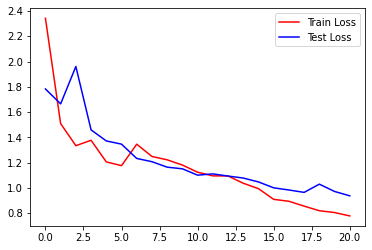

In [0]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train Loss': 'r', 'Test Loss':'b'})
plt.show()

In [0]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_miou'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['miou'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

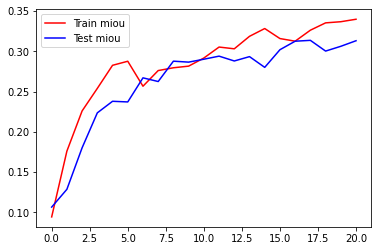

In [0]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train miou': 'r', 'Test miou':'b'})
plt.show()

In [0]:
val_loss = []
for i in range(len(history_1)):
  val_loss.append(history_1[i].history['val_accuracy'])

flat_val_loss = []
for sublist in val_loss:
    for item in sublist:
        flat_val_loss.append(item)

loss = []
for i in range(len(history_1)):
  loss.append(history_1[i].history['accuracy'])

flat_loss = []
for sublist in loss:
    for item in sublist:
        flat_loss.append(item)

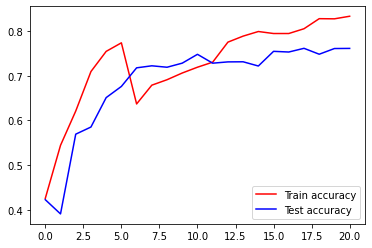

In [0]:
import matplotlib.pyplot as plt


plt.plot(flat_loss, 'r')
plt.plot(flat_val_loss, 'b')
plt.legend({'Train accuracy': 'r', 'Test accuracy':'b'})
plt.show()

In [0]:
x_path = paths.list_images("/content/drive/My Drive/IDD/leftImg8bit/test")
x_path = sorted(x_path)
x_path[:5]

['/content/drive/My Drive/IDD/leftImg8bit/test/200/frame0199_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame0252_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame1090_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame1250_leftImg8bit.jpg',
 '/content/drive/My Drive/IDD/leftImg8bit/test/200/frame1457_leftImg8bit.jpg']

In [0]:
image_te = []
image = cv2.imread(x_path[0])
img = cv2.resize(image, (256, 256))
img = np.float32(img)  / 255 
image_te.append(img)
image_te = np.array(image_te)
result = model.predict(image_te)
result = np.argmax(result, axis=3)

In [0]:
colors = np.array([
    [255, 192 ,203	],      
    [255, 160, 122],     
    [255, 105, 180],      
    [205,  92,  92],        
    [255, 165,   0],    
    [255, 255,   0],      
    [165,  42,  42],     
    [0,   0, 255]           
], dtype=np.int)
image_y_te = []

color_image = np.zeros(
        (result.shape[1], result.shape[2], 3), dtype=np.int)
for i in range(8):
  color_image[result[0] == i] = colors[i]
image_y_te.append(color_image)
image_y_te = np.array(image_y_te)

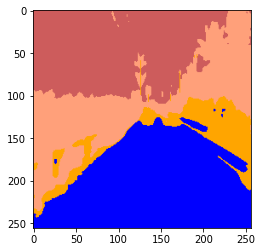

In [0]:

from matplotlib import image
from matplotlib import pyplot

pyplot.imshow(color_image)
pyplot.show()

uint8
(1080, 1920, 3)


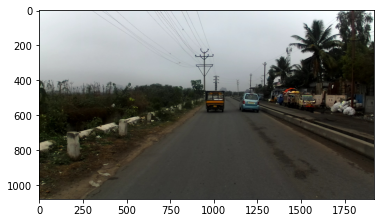

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(x_path[0])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [0]:
image_te = []
image = cv2.imread(x_path[1])
img = cv2.resize(image, (256, 256))
img = np.float32(img)  / 255 
image_te.append(img)
image_te = np.array(image_te)
result = model.predict(image_te)
result = np.argmax(result, axis=3)
colors = np.array([
    [255, 192 ,203	],      
    [255, 160, 122],     
    [255, 105, 180],      
    [205,  92,  92],        
    [255, 165,   0],    
    [255, 255,   0],      
    [165,  42,  42],     
    [0,   0, 255]           
], dtype=np.int)
image_y_te = []

color_image = np.zeros(
        (result.shape[1], result.shape[2], 3), dtype=np.int)
for i in range(8):
  color_image[result[0] == i] = colors[i]
image_y_te.append(color_image)
image_y_te = np.array(image_y_te)

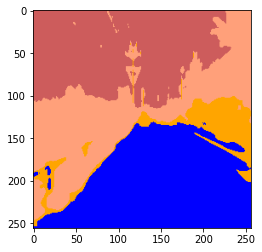

In [0]:

from matplotlib import image
from matplotlib import pyplot

pyplot.imshow(color_image)
pyplot.show()

uint8
(1080, 1920, 3)


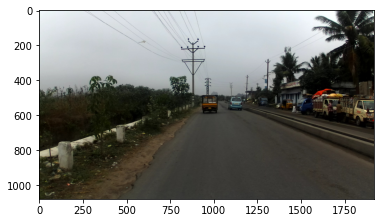

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(x_path[1])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [0]:
image_te = []
image = cv2.imread(x_path[300])
img = cv2.resize(image, (256, 256))
img = np.float32(img)  / 255 
image_te.append(img)
image_te = np.array(image_te)
result = model.predict(image_te)
result = np.argmax(result, axis=3)
colors = np.array([
    [255, 192 ,203	],      
    [255, 160, 122],     
    [255, 105, 180],      
    [205,  92,  92],        
    [255, 165,   0],    
    [255, 255,   0],      
    [165,  42,  42],     
    [0,   0, 255]           
], dtype=np.int)
image_y_te = []

color_image = np.zeros(
        (result.shape[1], result.shape[2], 3), dtype=np.int)
for i in range(8):
  color_image[result[0] == i] = colors[i]
image_y_te.append(color_image)
image_y_te = np.array(image_y_te)

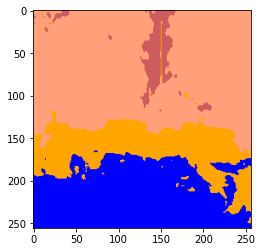

In [0]:

from matplotlib import image
from matplotlib import pyplot

pyplot.imshow(color_image)
pyplot.show()

uint8
(1080, 1920, 3)


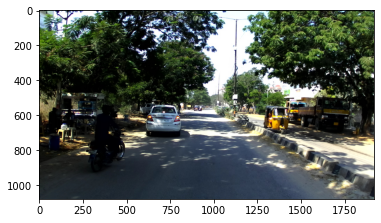

In [0]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(x_path[300])
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()